In [70]:
from si.data.dataset import Dataset
import numpy as np
from si.neural_networks.layers import Layer, DenseLayer, Dropout
from si.neural_networks.neural_network import NeuralNetwork
from si.neural_networks.optimizers import SGD, Adam
from si.neural_networks.activation import ReLUActivation,SigmoidActivation, TanhActivation, SoftmaxActivation
from si.neural_networks.losses import BinaryCrossEntropy
from si.model_selection.split import stratified_train_test_split
from si.metrics.accuracy import accuracy
import matplotlib.pyplot as plt

### Test dropout

In [71]:
np.random.seed(42)
x = np.array([[5, 8, 9, 5, 10, 2, 1, 7, 6, 9]])
print("x:", x)
dropout = Dropout(0.5)
print("output training:", dropout.forward_propagation(x, training=True))
print("mask:", dropout.mask)

print("output inference:", dropout.forward_propagation(x, training=False))

x: [[ 5  8  9  5 10  2  1  7  6  9]]
output training: [[ 0. 16. 18. 10.  0.  0.  0. 14. 12. 18.]]
mask: [[0 1 1 1 0 0 0 1 1 1]]
output inference: [[ 5  8  9  5 10  2  1  7  6  9]]


### Test TanhActivation

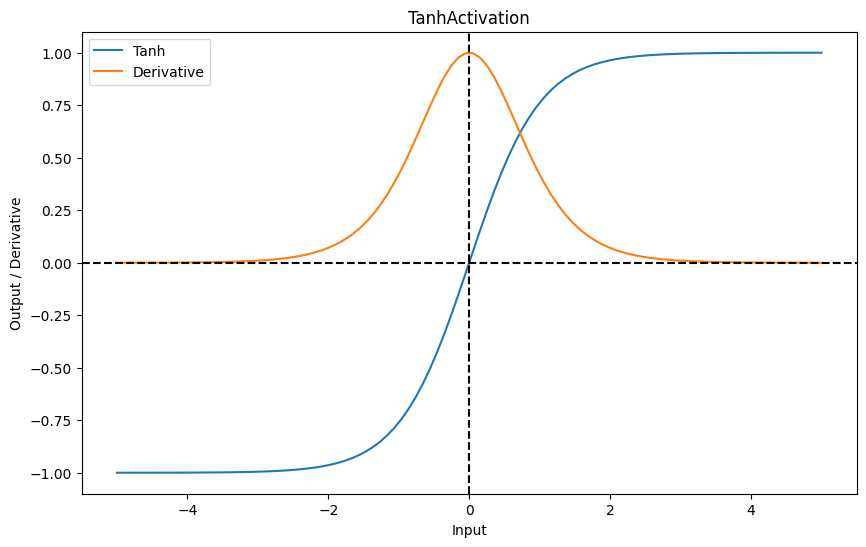

In [72]:
tanh_activation = TanhActivation()

# Generate input values
x_values = np.linspace(-5, 5, 100)

# Calculate Tanh activation and its derivative for each input value
tanh_y_activation = tanh_activation.activation_function(x_values)
tanh_y_derivative = tanh_activation.derivative(x_values)


# Plot Tanh activation function and its derivative on the same plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, tanh_y_activation, label='Tanh')
plt.plot(x_values, tanh_y_derivative, label='Derivative')
plt.title('TanhActivation')
plt.xlabel('Input')
plt.ylabel('Output / Derivative')
plt.legend()

# Add grid lines at x=0 and y=0
plt.axhline(0, color='black',linestyle = '--')
plt.axvline(0, color='black',linestyle = '--')

# Display the plot
plt.show()

### Test softmax

In [73]:
softmax_activation = SoftmaxActivation()

scores2D = np.array([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]])

print(softmax_activation.activation_function(scores2D))
print(np.sum(softmax_activation.activation_function(scores2D), axis=1))


[[0.00626879 0.01704033 0.04632042 0.93037047]
 [0.01203764 0.08894682 0.24178252 0.65723302]
 [0.00446236 0.66227241 0.24363641 0.08962882]]
[1. 1. 1.]


### Test CategoricalCrossEntropy

In [74]:
from si.neural_networks.losses import CategoricalCrossEntropy

cross_entropy_loss = CategoricalCrossEntropy()

# Generate input values
x_values = np.array([[1,2,3], [4,5,6], [7,8,9]])
y_values = np.array([[1.9,2.9,3.9], [4.9,5.9,6.9], [7.9,8.9,9.9]])


# Calculate loss for each input-target pair
loss = cross_entropy_loss.loss(x_values, y_values)
derivative = cross_entropy_loss.derivative(x_values, y_values)

print(loss)
print(derivative)


4.496403249731887e-14
[[-1. -2. -3.]
 [-4. -5. -6.]
 [-7. -8. -9.]]


### Test Adam optimizer

In [75]:
weights = np.array([1, 2, 3, 4, 5])
grad_loss_weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# compare learning rates
for x in [0.01, 0.1, 0.5]:
    adam_optimizer = Adam(learning_rate=x)
    updated_w_adam = adam_optimizer.update(weights, grad_loss_weights)
    print(f"Learing Rate {x}:", updated_w_adam)

Learing Rate 0.01: [0.99 1.99 2.99 3.99 4.99]
Learing Rate 0.1: [0.90000001 1.9        2.9        3.9        4.9       ]
Learing Rate 0.5: [0.50000005 1.50000002 2.50000002 3.50000001 4.50000001]


### Build , train and evaluate a neural network

In [76]:
# creating training dataset with 32 features

np.random.seed(42)
X = np.random.randn(320, 32) 
y = np.random.randint(2, size=(320, 1))

dataset = Dataset(X, y)
dataset.shape()

(320, 32)

In [77]:
dataset.shape()[1]

32

In [78]:
# split dataset into train and test sets
train_dataset, test_dataset = stratified_train_test_split(dataset, test_size=0.4)
test_dataset, validation_dataset = stratified_train_test_split(test_dataset, test_size=0.5)
print(train_dataset.shape())
print(test_dataset.shape())
print(validation_dataset.shape())

(193, 32)
(64, 32)
(63, 32)


In [79]:
#assembling and training the neural network
nn_train = NeuralNetwork(epochs=100, batch_size=16, optimizer=SGD, learning_rate=0.01, verbose=True, loss=BinaryCrossEntropy, metric=accuracy)
nn_train.add(DenseLayer(32, (dataset.shape()[1],)))
nn_train.add(ReLUActivation())
nn_train.add(DenseLayer(16))
nn_train.add(ReLUActivation())
nn_train.add(DenseLayer(1))
nn_train.add(SigmoidActivation())
nn_train.fit(train_dataset)


Epoch 1/100 - loss: 150.5536 - accuracy: 0.4323
Epoch 2/100 - loss: 132.8488 - accuracy: 0.5208
Epoch 3/100 - loss: 124.3858 - accuracy: 0.6198
Epoch 4/100 - loss: 118.9181 - accuracy: 0.6875
Epoch 5/100 - loss: 112.1435 - accuracy: 0.7188
Epoch 6/100 - loss: 104.9274 - accuracy: 0.7344
Epoch 7/100 - loss: 96.1809 - accuracy: 0.7760
Epoch 8/100 - loss: 88.6816 - accuracy: 0.8177
Epoch 9/100 - loss: 82.4760 - accuracy: 0.8229
Epoch 10/100 - loss: 71.0151 - accuracy: 0.8698
Epoch 11/100 - loss: 60.7220 - accuracy: 0.8854
Epoch 12/100 - loss: 52.2381 - accuracy: 0.9271
Epoch 13/100 - loss: 42.1762 - accuracy: 0.9531
Epoch 14/100 - loss: 36.5961 - accuracy: 0.9896
Epoch 15/100 - loss: 30.0403 - accuracy: 0.9740
Epoch 16/100 - loss: 25.3398 - accuracy: 0.9896
Epoch 17/100 - loss: 20.2702 - accuracy: 0.9948
Epoch 18/100 - loss: 16.5797 - accuracy: 1.0000
Epoch 19/100 - loss: 13.1834 - accuracy: 1.0000
Epoch 20/100 - loss: 11.2583 - accuracy: 1.0000
Epoch 21/100 - loss: 9.7433 - accuracy: 1.0

Epoch 83/100 - loss: 0.4864 - accuracy: 1.0000
Epoch 84/100 - loss: 0.4955 - accuracy: 1.0000
Epoch 85/100 - loss: 0.4863 - accuracy: 1.0000
Epoch 86/100 - loss: 0.4800 - accuracy: 1.0000
Epoch 87/100 - loss: 0.4697 - accuracy: 1.0000
Epoch 88/100 - loss: 0.4601 - accuracy: 1.0000
Epoch 89/100 - loss: 0.4544 - accuracy: 1.0000
Epoch 90/100 - loss: 0.4471 - accuracy: 1.0000
Epoch 91/100 - loss: 0.4378 - accuracy: 1.0000
Epoch 92/100 - loss: 0.4317 - accuracy: 1.0000
Epoch 93/100 - loss: 0.4254 - accuracy: 1.0000
Epoch 94/100 - loss: 0.4142 - accuracy: 1.0000
Epoch 95/100 - loss: 0.4071 - accuracy: 1.0000
Epoch 96/100 - loss: 0.4037 - accuracy: 1.0000
Epoch 97/100 - loss: 0.3957 - accuracy: 1.0000
Epoch 98/100 - loss: 0.3885 - accuracy: 1.0000
Epoch 99/100 - loss: 0.3849 - accuracy: 1.0000
Epoch 100/100 - loss: 0.3766 - accuracy: 1.0000


In [80]:
# testing the model
result=nn_train.score(test_dataset)
print(result)

0.578125


In [81]:
nn_val = NeuralNetwork(epochs=100, batch_size=16, optimizer=SGD, learning_rate=0.01, verbose=True, loss=BinaryCrossEntropy, metric=accuracy)
nn_val.add(DenseLayer(32, (dataset.shape()[1],)))
nn_val.add(ReLUActivation())
nn_val.add(DenseLayer(16))
nn_val.add(ReLUActivation())
nn_val.add(DenseLayer(1))
nn_val.add(SigmoidActivation())
nn_val.fit(validation_dataset)

Epoch 1/100 - loss: 48.7334 - accuracy: 0.5625
Epoch 2/100 - loss: 35.3078 - accuracy: 0.5417
Epoch 3/100 - loss: 31.9917 - accuracy: 0.6250
Epoch 4/100 - loss: 29.1594 - accuracy: 0.6250
Epoch 5/100 - loss: 29.5289 - accuracy: 0.6667
Epoch 6/100 - loss: 27.4040 - accuracy: 0.7292
Epoch 7/100 - loss: 23.7851 - accuracy: 0.7917
Epoch 8/100 - loss: 22.2791 - accuracy: 0.8958
Epoch 9/100 - loss: 23.6213 - accuracy: 0.8125
Epoch 10/100 - loss: 21.3302 - accuracy: 0.8542
Epoch 11/100 - loss: 17.5961 - accuracy: 0.8958
Epoch 12/100 - loss: 18.3664 - accuracy: 0.9167
Epoch 13/100 - loss: 14.6297 - accuracy: 0.9583
Epoch 14/100 - loss: 14.2180 - accuracy: 0.9583
Epoch 15/100 - loss: 12.4316 - accuracy: 0.9792
Epoch 16/100 - loss: 12.0766 - accuracy: 0.9792
Epoch 17/100 - loss: 10.5902 - accuracy: 1.0000
Epoch 18/100 - loss: 10.1773 - accuracy: 0.9792
Epoch 19/100 - loss: 8.1172 - accuracy: 0.9792
Epoch 20/100 - loss: 7.7600 - accuracy: 0.9792
Epoch 21/100 - loss: 7.7105 - accuracy: 0.9792
Epoc

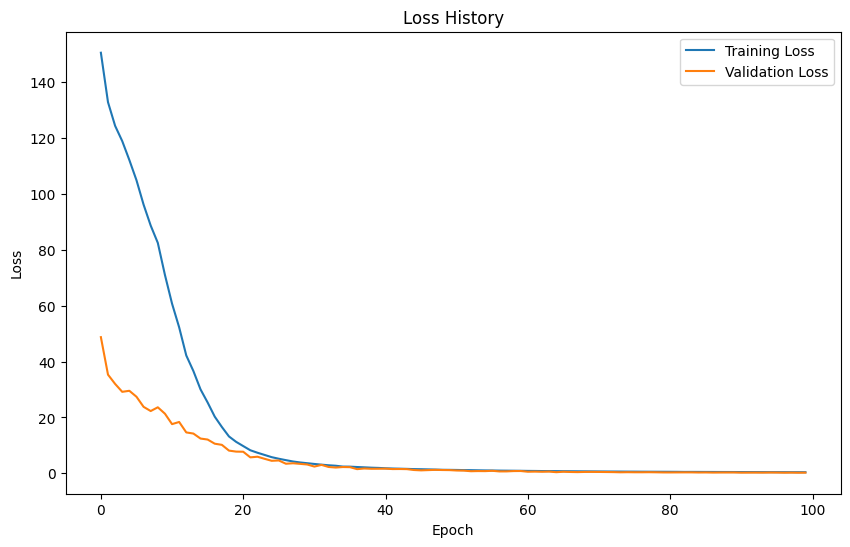

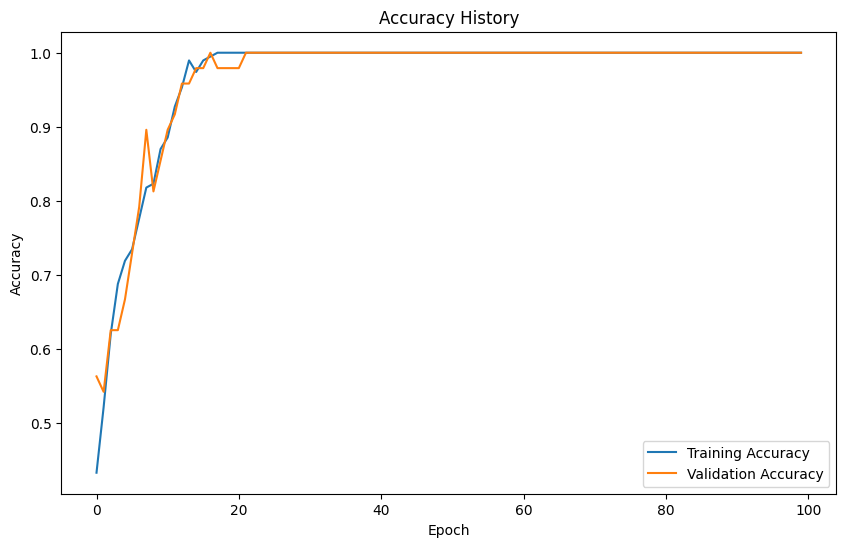

In [84]:
loss_train = [nn_train.history[x+1]['loss'] for x in range(nn_train.epochs)]
accuracy_train = [nn_train.history[x+1]['metric'] for x in range(nn_train.epochs)]

loss_val = [nn_val.history[x+1]['loss'] for x in range(nn_val.epochs)]
accuracy_val = [nn_val.history[x+1]['metric'] for x in range(nn_val.epochs)]

plt.figure(figsize=(10, 6))
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy_val, label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
